###Team ImBED
###공개sw개발자 대회
###please import csv file before you run it

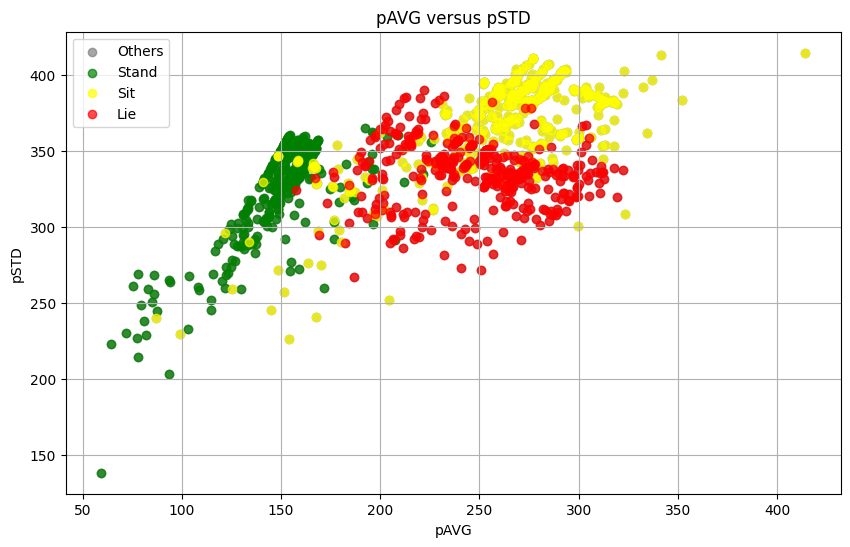

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter the values of pAVG separated by spaces: 340
Enter the values of pSTD separated by spaces: 280
Predicted state_data: ['sit']


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

pIBD = pd.read_csv('/content/ImBED DATA ONLY TEXT8.csv')

def plot_original_scatter_with_colors(data):

    x_data = data['pAVG']
    y_data = data['pSTD']

    stand_data = data[data['state_data'] == 'stand']
    sit_data = data[data['state_data'] == 'sit']
    lie_data = data[data['state_data'] == 'lie']

    plt.figure(figsize=(10, 6))

    plt.scatter(x_data, y_data, c='gray', label='Others', alpha=0.7)
    plt.scatter(stand_data['pAVG'], stand_data['pSTD'], c='green', label='Stand', alpha=0.7)
    plt.scatter(sit_data['pAVG'], sit_data['pSTD'], c='yellow', label='Sit', alpha=0.7)
    plt.scatter(lie_data['pAVG'], lie_data['pSTD'], c='red', label='Lie', alpha=0.7)

    plt.xlabel('pAVG')
    plt.ylabel('pSTD')
    plt.title('pAVG versus pSTD')
    plt.legend()
    plt.grid()
    plt.show()


plot_original_scatter_with_colors(pIBD)


def train_kmeans(data, num_clusters=3):

    X = data[['pAVG', 'pSTD']]
    y = data['state_data']


    le = LabelEncoder()
    y = le.fit_transform(y)


    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X, y)

    return kmeans, le


kmeans, le = train_kmeans(pIBD)

def predict_state_data(kmeans, le, x_data, y_data):

    new_data = pd.DataFrame({'pAVG': x_data, 'pSTD': y_data})


    new_data['state_data'] = kmeans.predict(new_data)


    new_data['state_data'] = le.inverse_transform(new_data['state_data'])

    return new_data['state_data'].tolist()


x_data_input = [float(x) for x in input("Enter the values of AVG: ").split()]
y_data_input = [float(y) for y in input("Enter the values of STD: ").split()]


if len(x_data_input) != len(y_data_input):
    print("Error: The number of 'pAVG' and 'pSTD' values must be the same.")
else:

    predicted_state_data = predict_state_data(kmeans, le, x_data_input, y_data_input)
    print("Predicted state_data:", predicted_state_data)
